In [1]:
import sys
sys.path.append("../") 
from nozzleSolver import NozzleSolver
import NozzleParams
import nozzleFactory
import refProp
import numSolvers
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time
import importlib
import scipy.optimize
pd.set_option('display.expand_frame_repr', False)
%matplotlib notebook

In [2]:
vin = 3.51
pin = 2100 # KPa
fluid= "BUTANE"
Tin = 273.15 + 70  # K
RP = refProp.setup(fluid)
[Din, hin] =  refProp.getDh_from_TP(RP, Tin, pin)

In [3]:
nozzle = nozzleFactory.ConicConic(1.0, 2.905,0.2215, 1.4116, 0.345 )
nozzle.setFriction( 1.0e-2 )
print(nozzle)
Nint = 250
nsolver = NozzleSolver(nozzle, fluid, Nint, "RG4", "basic")

Axis symmetric Nozzle with :
inlet cross section 3.141592653589793 cm^2 
throat cross section 0.15413360416858587 cm^2 
throat diameter 0.44300000000000006 cm 
outlet cross section 0.3739280655935249 cm^2 
outlet diameter 0.6899999999999998 cm 
Length 4.316599999999999 cm 
The throat is at 2.905 cm from the inlet 
Friction coefficient 0.01 



In [4]:
Nint = nsolver.nint
nozzle = nsolver.nozzle
ARatio = nozzle.Ain / nozzle.At
mdevx = nozzle.L / Nint / ARatio

In [5]:
mdevx

0.0008471284334000002

In [6]:
vin_crit = nsolver.calcCriticalSpeed(pin, hin, v0=2.3, maxdev=mdevx)

iteration 1 dev : -0.094184 x val : 4.34551
iteration 2 dev : -0.008235 x val : 3.60847
iteration 3 dev : -0.012612 x val : 3.60773
iteration 4 dev : -0.00517 x val : 3.52367
iteration 5 dev : -0.002838 x val : 3.52383
iteration 6 dev : -0.002877 x val : 3.52404
iteration 7 dev : -0.001057 x val : 3.5152
iteration 8 dev : -0.001897 x val : 3.51408
iteration 9 dev : -0.001037 x val : 3.50902
iteration 10 dev : -0.000578 x val : 3.506
Newton Raphson has converged in 10 iterations
critical speed calculation finished in 171.634 sec
critical inlet velocity is 3.5059965980726644 m/s


<IPython.core.display.Javascript object>


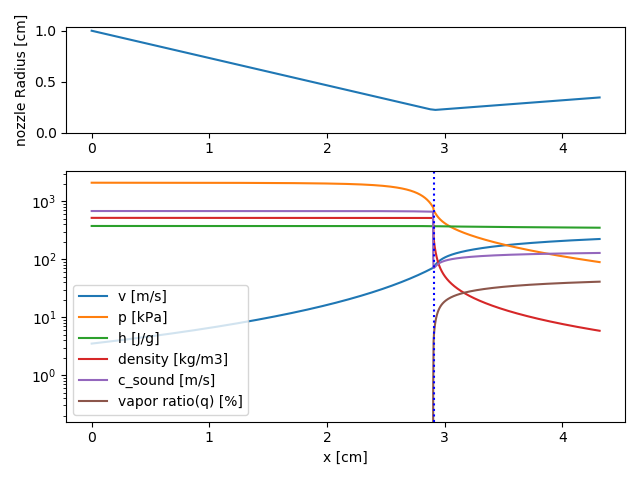

In [20]:
res = nsolver.solveNplot( vin_crit, pin , hin)

In [8]:
nsolver.sonicPoint(vin_crit, pin, hin)

2.9044219845380193

In [9]:
nsolver.sonicPoint(vin_crit-mdevx/10.0, pin, hin)

2.904523519933222

In [10]:
nsolver.sonicPoint(vin_crit+mdevx/10.0, pin, hin)

2.9043380557924396

In [11]:
fun2solve = lambda x : nsolver.sonicPoint(x, pin, hin)

In [12]:
numSolvers.diff(fun2solve, vin_crit, mdevx)

-61.66657378842068

<IPython.core.display.Javascript object>


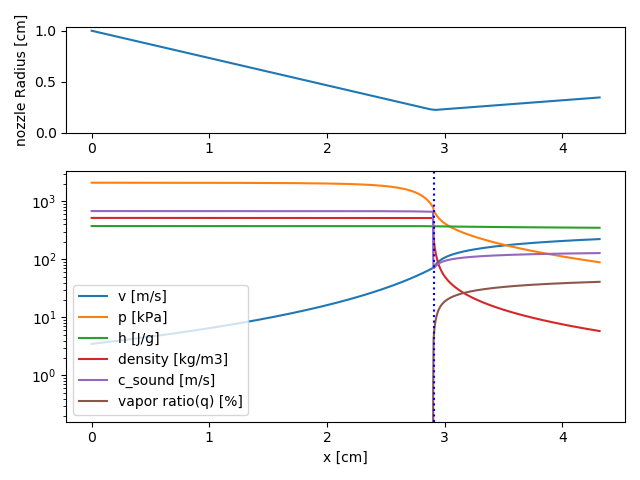

In [19]:
propx = nsolver.solveNplot( vin_crit + mdevx/10.0, pin , hin)